fiat_matplotlib: display matplotlib figures
===========================================


Fiatlight provides `FigureWithGui`, a viewer for Matplotlib figures.

Example
-------

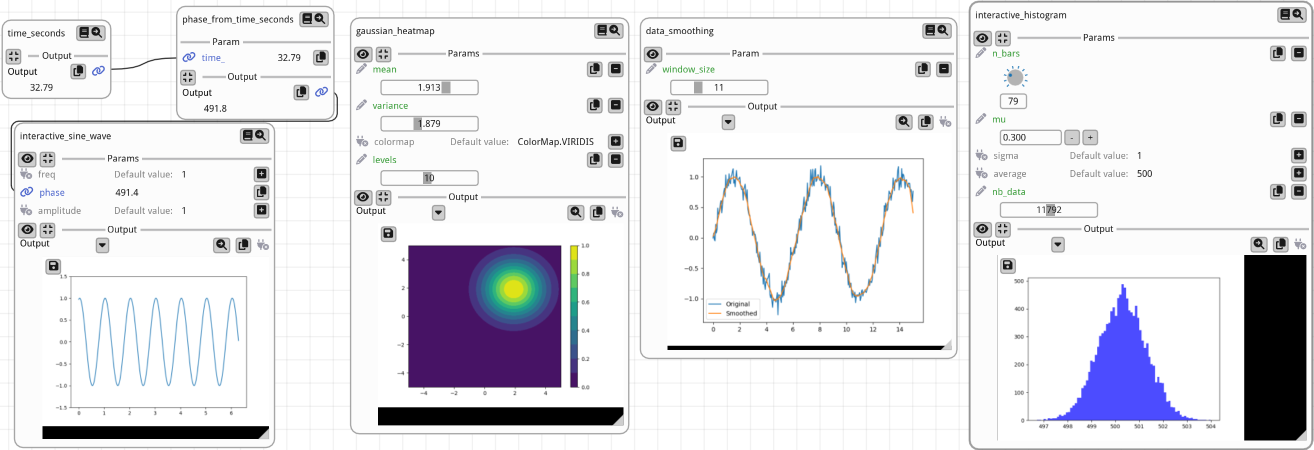

In [2]:
from fiatlight.fiat_kits.fiat_matplotlib import demo_matplotlib

demo_matplotlib.main()

Fiat attributes available for the FigureWithGui widget
--------------------------------------------------------

The FigureWithGui widget is not customizable. However, it can be zoomed by the user and this setting will be saved.


Source code for the example
---------------------------

In [1]:
import fiatlight
from fiatlight.fiat_notebook import look_at_code  # noqa
%look_at_python_file fiat_kits/fiat_matplotlib/demo_matplotlib.py

"""Interactive Matplotlib Figures with Fiatlight

This example demonstrates several types of matplotlib figures rendered within Fiatlight with interactive GUI elements, including a sine wave plot, a Gaussian heatmap, data smoothing, and a histogram.
"""

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np
from enum import Enum
import time
import fiatlight as fl


# Initialize the start time
_start_time = time.time()


def time_seconds() -> float:
    """Returns the time elapsed since the start of the application."""
    return time.time() - _start_time


def phase_from_time_seconds(time_: float) -> float:
    """Calculates the phase from the given time."""
    return time_ * 15.0


# Set the function to always update
time_seconds.invoke_always_dirty = True  # type: ignore


def interactive_sine_wave(freq: float = 1.0, phase: float = 0.0, amplitude: float = 1.0) -> Figure:
    """Generates an interactive sine wave with adjustable frequency, phase, and amplitude."""
    x = np.linspace(0, 2 * np.pi, 3000)
    y = amplitude * np.sin(2 * np.pi * freq * x + phase)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_ylim([-1.5, 1.5])  # Adjust the y-axis limits
    return fig


# Set ranges and edit types for the sine wave parameters
fl.add_fiat_attributes(
    interactive_sine_wave,
    freq__range=(0.1, 3),
    phase__range=(-np.pi, np.pi),
    amplitude__range=(0.1, 2),
    freq__edit_type="knob",
    phase__edit_type="knob",
    amplitude__edit_type="knob",
)


class ColorMap(Enum):
    VIRIDIS = "viridis"
    PLASMA = "plasma"
    INFERNO = "inferno"
    MAGMA = "magma"
    CIVIDIS = "cividis"


@fl.with_fiat_attributes(
    mean__range=(-5, 5),
    variance__range=(0.1, 5),
    levels__range=(1, 20),
)
def gaussian_heatmap(
    mean: float = 0, variance: float = 1, colormap: ColorMap = ColorMap.VIRIDIS, levels: int = 10
) -> Figure:
    """Generates a Gaussian heatmap with adjustable mean, variance, colormap, and number of contour levels."""
    x = y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-((X - mean) ** 2 + (Y - mean) ** 2) / (2 * variance))
    fig, ax = plt.subplots()
    contour = ax.contourf(X, Y, Z, levels, cmap=colormap.value)
    fig.colorbar(contour, ax=ax)
    return fig


@fl.with_fiat_attributes(window_size__range=(1, 40))
def data_smoothing(window_size: int = 5) -> Figure:
    """Demonstrates data smoothing using a moving average filter."""
    x = np.linspace(0, 15, 300)
    y = np.sin(x) + np.random.normal(0, 0.1, 300)  # Noisy sine wave
    y_smooth = np.convolve(y, np.ones(window_size) / window_size, mode="same")
    fig, ax = plt.subplots()
    ax.plot(x, y, label="Original")
    ax.plot(x, y_smooth, label="Smoothed")
    ax.legend()
    return fig


def interactive_histogram(
    n_bars: int = 10, mu: float = 0, sigma: float = 1, average: float = 500, nb_data: int = 1000
) -> Figure:
    """Generates an interactive histogram with adjustable number of bars, mean, and standard deviation."""
    data = np.random.normal(mu, sigma, int(nb_data)) + average
    bins = np.linspace(np.min(data), np.max(data), n_bars)
    fig, ax = plt.subplots()
    ax.hist(data, bins=bins, color="blue", alpha=0.7)
    return fig


# Set interactive parameters for the histogram
fl.add_fiat_attributes(
    interactive_histogram,
    n_bars__edit_type="knob",
    n_bars__range=(1, 300),
    mu__edit_type="input",
    mu__range=(-5, 5),
    sigma__edit_type="drag",
    sigma__range=(0.1, 5),
    average__edit_type="slider_float_any_range",
    nb_data__edit_type="slider",
    nb_data__range=(100, 1_000_000),
    nb_data__slider_logarithmic=True,
    nb_data__slider_no_input=True,
)


def main() -> None:
    """Main function to run the Fiatlight application with interactive matplotlib figures."""
    import fiatlight

    # Create a graph to manage functions and their links
    graph = fiatlight.FunctionsGraph()
    graph.add_function(interactive_sine_wave)
    gra